In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
from tensorflow.keras import backend as K
print(K.epsilon())

1e-07


In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [4]:
#load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
# count the number of unique training labels
unique, counts = np.unique(y_train,return_counts=True)
print("Train labels: ",dict(zip(unique,counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
# count the number of unique test labels
unique, counts = np.unique(y_test,return_counts=True)
print("Train labels: ",dict(zip(unique,counts)))

Train labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [7]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0,x_train.shape[0],size=25)
images = x_train[indexes]
labels = y_train[indexes]



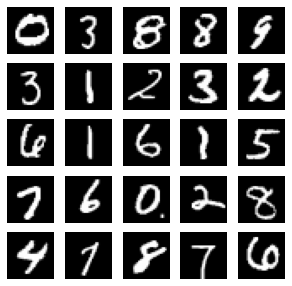

In [8]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')

plt.savefig("mnist-samples.png")
plt.show()
    

In [9]:
plt.close('all')

In [10]:
# MNIST digit classifier using MLP

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist 

In [12]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [13]:
# number of labels
num_labels = len(np.unique(y_train))

In [14]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
# image dimension
image_size = x_train.shape[1]
input_size = image_size*image_size
print(input_size)

784


In [16]:
#resize and normalize
x_train = np.reshape(x_train,[-1,input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45


In [18]:
model = Sequential()

In [19]:
model.add(Dense(hidden_units,input_dim = input_size))

In [20]:
model.add(Activation('relu'))

In [21]:
model.add(Dropout(dropout))

In [22]:
model.add(Dense(hidden_units))

In [23]:
model.add(Activation('relu'))

In [24]:
model.add(Dropout(dropout))

In [25]:
model.add(Dense(num_labels))

In [26]:
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

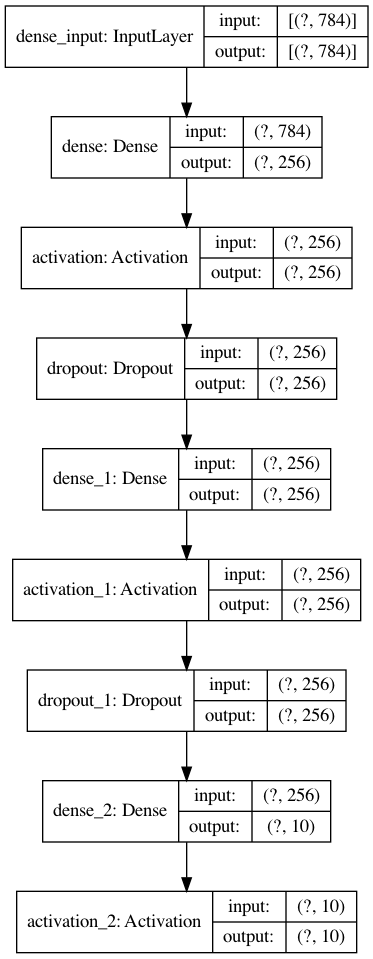

In [30]:
plot_model(model,to_file='model.png',show_shapes=True)

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4326 - accuracy: 0.8664
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1948 - accuracy: 0.9420
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1541 - accuracy: 0.9538
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1280 - accuracy: 0.9610
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1141 - accuracy: 0.9653
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1037 - accuracy: 0.9676
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0933 - accuracy: 0.9712
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0884 - accuracy: 0.9725
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0823 - accuracy: 0.9744
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0781 - accuracy: 0.9755

In [39]:
# validate the model on test data
_, acc = model.evaluate(x_test,y_test,batch_size = batch_size,verbose = 1)

79/79 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9827


In [40]:
print("Test Accuracy: %.1f%%" %(100*acc))

Test Accuracy: 98.3%
